## Context
Cars4U is a budding tech start-up that aims to find footholes in the Used car market as pre-owned car market has continued to grow over the past years (specifically between 2018-19). Unlike New Cars where pricingh and supply are failrly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts, used cars have huge uncertainty in both pricing and supply. Therefore, it is very important for Cars4U as a start-up to be able to determine what its future supply and pricing will be like in order to manage its future growth and keep a foothole in ever growing Used car market. 

## Objective
Analyze the data and come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. 

## Key Questions
1) What will be the market price in order to plan target price to not sell below market value?

 # **Sanity Check & Data PreProcessing**
  ____________________

<h3 style="color:Brown">Loading and Exploring Data</h3>

In [113]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black
# To Suppress warning such as future warnings
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
# For reading and manipulating data
import pandas as pd
import numpy as np

# Libraries used for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

# Command to tell Python to actually display the graphs
%matplotlib inline
# Remove the limit from the number of displayed columns and rows so i can see the entire df when printing
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# Libraries used in Data Split (to test and train)
from sklearn.model_selection import train_test_split

# Libraries used for Linear Regression Model Building
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [12]:
# Importing data into data Variable which is our original Data
data = pd.read_csv(
    "https://raw.githubusercontent.com/miricoder/projects/main/Supervised_Learning_Regression/used_cars_data.csv"
)
# Creating Copy of The original Data
df = data.copy()

<IPython.core.display.Javascript object>

In [13]:
# Making sure data is properly Loaded
df.head(5)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


<IPython.core.display.Javascript object>

In [15]:
# Checking the duplicate data
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

- We only have 1 duplicate data so we won't need to worry too much about that

In [16]:
# Display column and row values using pyton 3's f-string
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

# Looking at the 10 random sample rows done using np.random
# Because looking at random values will give you better understaning than head or tail values
np.random.seed(1)
df.sample(10)

There are 7253 rows and 14 columns.


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,35.29,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,8.23,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,67.10,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,10.25,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36,8.20


<IPython.core.display.Javascript object>

- After carefully analyzing, column name: `S.No.` is the only column that needs to be dropped reason being:
  * Pandas already provides column id which matches that of S.No and renders S.No's usage pointless 
- `Mileage,Engine,Power` columns needs to be turned into numerics
- Year columns seems ok so far
- Categorical Values like below needs to be applied one-hot encoding closer to the end of our analysis right before model building 
     `Fuel_Type,Transmission,Owner_Type`
     
- `Names` column values seems long and could cause issues later when do Bivariate and Univariate Analysis so we need to fix it 
 This kind of columns are prone to error like the following in Bivariate or Univariate stages. Meaning too many words and text length will error like below and plotting will look like the following.  
 <h5 style="color: red" > ValueError: Image size of 147024x360 pixels is too large. It must be less than 2^16 in each direction.</h6>
 
 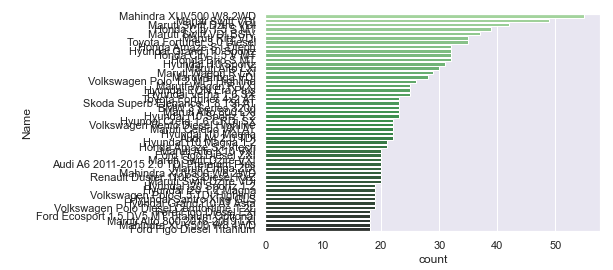

**Basic EDA-Statistical Summary before going any further to see how our data is looking**

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.00,3626.00,5439.00,7252.0
Year,7253.0,2013.365366,3.254421,1996.00,2011.00,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.00,5.00,5.00,10.0
New_Price,7253.0,21.307322,24.256314,3.91,7.88,11.30,21.69,375.0
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.0


<IPython.core.display.Javascript object>

- Count of Price is less than other columns, this could be due to missing values, we will see more as move forward. 

**Dropping the S.No Column**

In [18]:
df.drop(["S.No."], axis=1, inplace=True)
# Validating that S.No. column is removed by checking  df.columns
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

<IPython.core.display.Javascript object>

**Text Processing / Fixing and testing the Name column before Bivariate and Univariate Analysis**

- As seen above long names and too many words in a name clutters with only 50 rows plotted, when this is tried in resuable labeled_barplot() methods, it won't even run due to the names being too long

In [19]:
# How many letter and words are in the car brand names?
auto_data = pd.DataFrame(
    data=[
        (i, len(i), len(i.split())) if i == i else (i, 0, 0)
        for i in df["Name"].str.strip().str.title().unique()
    ],
    columns=["Name", "Number of Letters", "Number of Words"],
)
auto_data.head(10)

,Name,Number of Letters,Number of Words
0,Maruti Wagon R Lxi Cng,22,5
1,Hyundai Creta 1.6 Crdi Sx Option,32,6
2,Honda Jazz V,12,3
3,Maruti Ertiga Vdi,17,3
4,Audi A4 New 2.0 Tdi Multitronic,31,6
5,Hyundai Eon Lpg Era Plus Option,31,6
6,Nissan Micra Diesel Xv,22,4
7,Toyota Innova Crysta 2.8 Gx At 8S,33,7
8,Volkswagen Vento Diesel Comfortline,35,4
9,Tata Indica Vista Quadrajet Ls,30,5


<IPython.core.display.Javascript object>

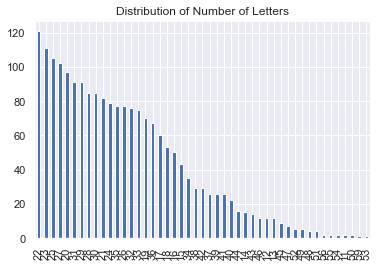

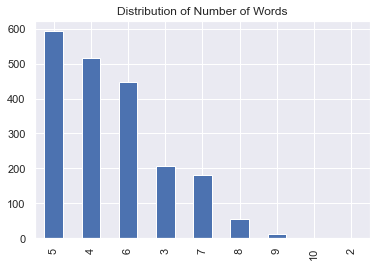

These are the Car Names with the most words in the name:


460    Bmw X5 2014-2019 Xdrive 30D Design Pure Experi...
Name: Name, dtype: object

<IPython.core.display.Javascript object>

In [20]:
auto_data["Number of Letters"].value_counts().plot.bar()
plt.title("Distribution of Number of Letters")
plt.show()

auto_data["Number of Words"].value_counts().plot.bar()
plt.title("Distribution of Number of Words")
plt.show()

print("These are the Car Names with the most words in the name:")
auto_data.loc[
    auto_data["Number of Words"] == auto_data["Number of Words"].max(), "Name"
]

Making a copy of the data before adding a new column called Name_Shortened which only contain the car name cut before the 1st space

In [21]:
df2 = df.copy()

<IPython.core.display.Javascript object>

In [22]:
# Will we shorten name to only take before the first space, in other words only the brand name and store
# it in a new column called Name_Shortened
df2["Name_Shortened"] = [x.split(maxsplit=1)[0] for x in df["Name"]]
# df["Name_Shortened"]
np.random.seed(1)
df2["Name_Shortened"].sample(10)

2397             Ford
3777           Maruti
4425             Ford
3661    Mercedes-Benz
4514          Hyundai
599            Toyota
186     Mercedes-Benz
305              Audi
4582          Hyundai
5434            Honda
Name: Name_Shortened, dtype: object

<IPython.core.display.Javascript object>

<h5 style="color:Brown">Quick Sanity Check</h5>

In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          7253 non-null   float64
 12  Price              6019 non-null   float64
 13  Name_Shortened     7253 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 793.4+ KB


<IPython.core.display.Javascript object>

- Name column is the first and S.No. column is now gone, our data is down total of 13 columns
- Mileage, Engine, Power, Seats, New_Price and Price all have missing values in them

<h3 style="color:Brown">Processing Data - Before Performing Statisical Analysis</h3>


**Converting `Mileage` column to numeric**

In [24]:
# Looping through to see how many columns have "km/kg" or "kmpl" endings
mileage_endings = ("km/kg", " km/kg", "kmpl")
mileage_cols = []
for colname in df2.columns[
    df2.dtypes == "object"
]:  # only need to consider string columns
    if (
        df2[colname].str.endswith(mileage_endings).any()
    ):  # using `.str` so I can use an element-wise string method
        mileage_cols.append(colname)
print(mileage_cols)

['Mileage']


<IPython.core.display.Javascript object>

In [25]:
def mileage_to_num(mileage_val):
    """
    This function takes in a string representing in Mileage in km/kg & kmpl
    and converts it to a number. For Example, 26.6 km/kg to 26.6
    or 19.67 kmpl to 19.67
    """
    if isinstance(mileage_val, str):  # checks if `mileage_val` is a string
        return float(mileage_val.replace("km/kg", "").replace("kmpl", ""))
    else:
        return np.nan


for colname in mileage_cols:
    df2[colname] = df2[colname].apply(mileage_to_num)
# Quick Sanity Check
df2[mileage_cols].head()

,Mileage
0,26.60
1,19.67
2,18.20
3,20.77
4,15.20


<IPython.core.display.Javascript object>

**Converting `Engine` column to numeric**

In [26]:
# Looping through to see how many columns have "bhp" endings
engine_endings = "CC"
engine_cols = []
for colname in df2.columns[
    df2.dtypes == "object"
]:  # only need to consider string columns
    if (
        df2[colname].str.endswith(engine_endings).any()
    ):  # using `.str` so I can use an element-wise string method
        engine_cols.append(colname)
print(engine_cols)

['Engine']


<IPython.core.display.Javascript object>

In [27]:
def engine_to_num(engine_val):
    """
    This function takes in a string representing in Mileage in CC
    and converts it to a number.
    """
    if isinstance(engine_val, str):  # checks if `mileage_val` is a string
        return float(engine_val.replace("CC", ""))
    else:
        return np.nan


for colname in engine_cols:
    df2[colname] = df2[colname].apply(engine_to_num)
# Quick Sanity Check
df2[engine_cols].head()

,Engine
0,998.0
1,1582.0
2,1199.0
3,1248.0
4,1968.0


<IPython.core.display.Javascript object>

**Converting `Power` column to numeric**

In [28]:
# Looping through to see how many columns have "CC" endings
power_endings = "bhp"
power_cols = []
for colname in df2.columns[
    df2.dtypes == "object"
]:  # only need to consider string columns
    if (
        df2[colname].str.endswith(power_endings).any()
    ):  # using `.str` so I can use an element-wise string method
        power_cols.append(colname)
print(power_cols)

['Power']


<IPython.core.display.Javascript object>

In [29]:
def power_to_num(power_val):
    """
    This function takes in a string representing in Mileage in bhp
    and converts it to a number.
    """
    if isinstance(power_val, str):  # checks if `mileage_val` is a string
        return float(power_val.replace("bhp", ""))
    else:
        return np.nan


for colname in power_cols:
    df2[colname] = df2[colname].apply(power_to_num)
# Quick Sanity Check
df2[power_cols].head()

,Power
0,58.16
1,126.20
2,88.70
3,88.76
4,140.80


<IPython.core.display.Javascript object>

In [30]:
# Printing the random sample from dataset to make sure above numeric conversions has taken affect
print(
    f"There are {df2.shape[0]} rows and {df2.shape[1]} columns."
)  # Additionally printing the shape of data
# Looking at the 10 random sample rows done using np.random
# Because looking at random values will give you better understaning than head or tail values
np.random.seed(1)
df.sample(10)

There are 7253 rows and 14 columns.


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47,6.00
3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44,4.11
4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,35.29,6.00
3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,35.28
4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,8.23,6.34
599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05,24.82
186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,32.00
305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,67.10,20.77
4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,10.25,2.50
5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36,8.20


<IPython.core.display.Javascript object>

- Data set is down to 13 columns from 14 and Mileage, Power, Enginer columns are now numeric

**Missing Value Treatment**

<h5 style="color:Brown">Quick Sanity Check</h5>

In [31]:
# Which columns has the most missing values**
df2.isnull().sum().sort_values(ascending=False)

Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
New_Price               0
Name_Shortened          0
dtype: int64

<IPython.core.display.Javascript object>

- `Price` column has the most values in it and since Price and its a problem since this is the column we are trying to predict
- `Power, Seats, Engine` also has missing values needs to be looked at
- `Mileage` has the least missing values, still needs to be looked at and treated 

In [32]:
# What is the null percentage per rows in column that have null values
column_name = ["Price", "Power", "Seats", "Engine", "Mileage"]
for i in df2[column_name]:
    print(
        f" Perecentage of null values in [{i}] is -->  {(sum(df2[i].isna()) / df2.shape[0]) * 100} '%'"
    )

 Perecentage of null values in [Price] is -->  17.01364952433476 '%'
 Perecentage of null values in [Power] is -->  2.4127947056390457 '%'
 Perecentage of null values in [Seats] is -->  0.7307321108506825 '%'
 Perecentage of null values in [Engine] is -->  0.6342203226251206 '%'
 Perecentage of null values in [Mileage] is -->  0.02757479663587481 '%'


<IPython.core.display.Javascript object>

**Price is out Target variable and has concerning amount of null values at 17% - We will drop all null values**
- Other Variables will be imputed with their mean values later

In [33]:
df2.dropna(subset=["Price"], inplace=True)

<IPython.core.display.Javascript object>

In [34]:
# let us reset the dataframe index
df2.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>

*Understading the pattern of null values for below Variables before imputing the values*
   - Power                 175 (null values-2.412%)
   - Seats                  53 (null values-0.730%)
   - Engine                 46 (null values-0.63%) 
   - Mileage                 2 (null values-0.027%) 

In [35]:
# counting the number of missing values per row
df2.isnull().sum(axis=1).value_counts()

0    5872
1     107
3      36
2       4
dtype: int64

<IPython.core.display.Javascript object>

- 5872 have `0` missing values, 107 has `1` missing values, 36 has `3` missing values, 4 has `1` missing values in them

In [36]:
# Checking the rows with 1 missing values
num_missing = df2.isnull().sum(axis=1)
df2[num_missing == 1].sample(n=5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Name_Shortened
5426,Hyundai Santro Xing XL,Chennai,2006,85000,Petrol,Manual,Third,0.00,1086.0,NaN,5.0,4.550,1.30,Hyundai
1068,Toyota Etios Liva GD,Pune,2012,225000,Diesel,Manual,Second,23.59,1364.0,NaN,5.0,8.525,2.60,Toyota
4954,Toyota Etios Liva GD,Coimbatore,2013,62601,Diesel,Manual,First,23.59,1364.0,NaN,5.0,8.525,4.67,Toyota
4351,Maruti Esteem LX BSII,Jaipur,2003,55000,Petrol,Manual,Third,15.90,1298.0,NaN,5.0,7.880,0.70,Maruti
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,4.550,1.20,Hyundai


<IPython.core.display.Javascript object>

- Where Rows in `Power` is missing `Price` is not, `10` samples also shows the same
- Further more we don't see any rows that comes before price causes price to have a missing value

In [37]:
# Checking the rows with 3 missing values
num_missing = df2.isnull().sum(axis=1)
df2[num_missing == 3].sample(n=5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Name_Shortened
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,13.580,1.50,Honda
2264,Toyota Etios Liva V,Pune,2012,24500,Petrol,Manual,Second,18.3,NaN,NaN,NaN,8.525,2.95,Toyota
3404,Maruti Swift 1.3 VXi,Jaipur,2006,125000,Petrol,Manual,Fourth & Above,16.1,NaN,NaN,NaN,7.880,2.35,Maruti
4152,Land Rover Range Rover 3.0 D,Mumbai,2003,75000,Diesel,Automatic,Second,0.0,NaN,NaN,NaN,120.000,16.11,Land
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1,NaN,NaN,NaN,7.880,2.11,Maruti


<IPython.core.display.Javascript object>

- Where `Engine` is missing, so does the `Power` & `Seats` rows

In [38]:
# Checking the rows with 2 missing values
num_missing = df2.isnull().sum(axis=1)
df2[num_missing == 2].sample(n=2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Name_Shortened
3800,Ford Endeavour Hurricane LE,Mumbai,2012,129000,Diesel,Automatic,First,12.8,2953.0,NaN,NaN,35.29,7.00,Ford
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,7.88,1.75,Maruti


<IPython.core.display.Javascript object>

- Only 2 Mileage Columns are missing where Power,Seats are also and Price is not..

There is a pattern which is analyzed programatically as below, and also all missing rows are numerical

In [39]:
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f"For the rows with exactly {n} missing values, NAs are found in:")
        n_miss_per_col = df2[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print("\n\n")

For the rows with exactly 1 missing values, NAs are found in:
Mileage      2
Power      103
Seats        2
dtype: int64



For the rows with exactly 2 missing values, NAs are found in:
Power    4
Seats    4
dtype: int64



For the rows with exactly 3 missing values, NAs are found in:
Engine    36
Power     36
Seats     36
dtype: int64





<IPython.core.display.Javascript object>

- As we can columns are either missing together or missing in seperate quantities and orders. Price is definetly affected 
- We will not drop these columns as we need them for our model, specially price. We will impute them with thei mean values 

*Imputing the numerical columns values with their mean values, keeping in mind that we will also need to do an Outlier treatment as means are prone to be affected by outliers*

In [40]:
# Using `fillna` with a numeric volumn
# We need to make sure of the column sequence to stay as per data column sequence, otherwise some rows
# won't be impupted into their mean value
numeric_cols = ["Mileage", "Engine", "Power", "Seats"]
for i in numeric_cols:
    print(df2[i].isnull().sum())
    df2[i].fillna(df2[i].mean(), inplace=True)  # mean imputation
    df2[i].isnull().sum()

2
36
143
42


<IPython.core.display.Javascript object>

In [41]:
# Which columns has the most missing values**
df2.isnull().sum().sort_values(ascending=False)

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
Name_Shortened       0
dtype: int64

<IPython.core.display.Javascript object>

- Now `Engine`, `Power`, `Seats`,`Price` are containing 0 missing values

**Basic EDA-Statistical Summary before going any further to see how our data is looking**

In [42]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.00,53000.00,73000.00,6500000.00
Mileage,6019.0,18.134961,4.581528,0.00,15.17,18.15,21.10,33.54
Engine,6019.0,1621.276450,599.553865,72.00,1198.00,1493.00,1969.00,5998.00
Power,6019.0,113.253050,53.231019,34.20,78.00,98.60,138.03,560.00
Seats,6019.0,5.278735,0.806012,0.00,5.00,5.00,5.00,10.00
New_Price,6019.0,21.499855,24.332922,3.91,7.88,11.30,21.77,375.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00


<IPython.core.display.Javascript object>

- Count in our columns is down from 7253 to 6019 after null values have been treated 
- `Mileage`: min is 0.00 indicating to a new Car, where max mileage of pre-owned vehicle is 34k miles
- `Engine`: Normally, a car's cc can range between 800 cc to 6000 cc. The lower the cc of the car, the better the mileage obtained, hence our median Engine CC is 1493, indicating that at least less than 50% of the vehicles in our data set are economical vehicles
- `Power`: Generally, anything more than 200bhp can reasonably be considered a high-performance car, in our case we do see some luxury vehicles with max 560 bhp, this will be further analyed in outlier treatment
- `Seats`: While most car brands whether ecnomical or luxury can have 5 seats, however 10 seats is usually for `2022 Ford Transit Passenger Van` type vehicles, there are seems to be some outliers here
- `Price`: Less than 75% of vehicles are resonably priced at less than 10K, however there are few outliers that has 160K, which are probably correl

In [43]:
# looking at value counts for non-numeric features

num_to_display = 10  # defining this up here so it's easy to change later if I want
for colname in df.dtypes[df2.dtypes == "object"].index:
    val_counts = df2[colname].value_counts(dropna=False)  # i want to see NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("\n\n")  # just for more space between

Mahindra XUV500 W8 2WD        49
Maruti Swift VDI              45
Honda City 1.5 S MT           34
Maruti Swift Dzire VDI        34
Maruti Swift VDI BSIV         31
Maruti Ritz VDi               30
Hyundai i10 Sportz            30
Toyota Fortuner 3.0 Diesel    29
Honda Amaze S i-Dtech         27
Hyundai Grand i10 Sportz      27
Name: Name, dtype: int64
Only displaying first 10 of 1876 values.



Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Name: Location, dtype: int64
Only displaying first 10 of 11 values.



Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64



Manual       4299
Automatic    1720
Name: Transmission, dtype: int64



First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64





<IPython.core.display.Javascript object>

- First Hand Vehicles, vehicles with Diesel Fuel_Type and Manual Tranimission are more popular as seems from the above numerical data count

# **EDA - Exploratory Data Analysis on PreProcessed Data**
_______________________________________________________
1) Independent Variable must always be Normally distributed in order to generalize effectively and not be biased 
   - If not normally distirbuted we need to perform transformation on data

<h3 style="color:Brown">Univariate Analysis</h3>

Reusable Method for Histplot and boxplot

In [44]:
def hist_box(data, feature, figsize=(10, 5), kde=True, bins=None):
    """
    Boxplot and Histogram combined within the same graph page
    in order to make comparison and analysis more efficient

    data: dataframe
    feature: dataframe column
    figsize: size of the figures (default (10,5))
    kde: whether to show the density curve (values set by user during usage - Boolean)
    bins: number of bins for histogram (default None)"""
    # f2 holds are graph withax_box2 and ax_hist2 params
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of subplot grid=2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # boxplot will be created and a star will indicate the mean value of the column
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")

    if bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
        )
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

Reusable Method for creating Barplots

In [45]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

Reusable Method for Calculating A five-number summary values - printing most important ones

In [46]:
def five_number_summary(data, column_name):
    """
    column_name: name of the column that should be searched and stats described for
    """
    # To get the 25%quantile
    _25p = data[column_name].quantile(0.25)
    # To get the median
    _median = data[column_name].median()
    # To get the mean
    _mean = data[column_name].mean()
    # To get the 75%Quantile
    _75p = data[column_name].quantile(0.75)
    # To get the Standard Deviation
    std = data[column_name].std()
    print(
        "25%",
        _25p,
        "\n" "Mean-Green",
        _mean,
        "\n" "Median-Boxplot",
        _median,
        "\n" "75%",
        _75p,
        "\n",
        "StandarD",
        std,
        "\n",
    )

<IPython.core.display.Javascript object>

`Analyzinig Numeric Columns: Year / Manufacturing year of the car`

25% 2011.0 
Mean-Green 2013.3581990363848 
Median-Boxplot 2014.0 
75% 2016.0 
 StandarD 3.2697421160913964 



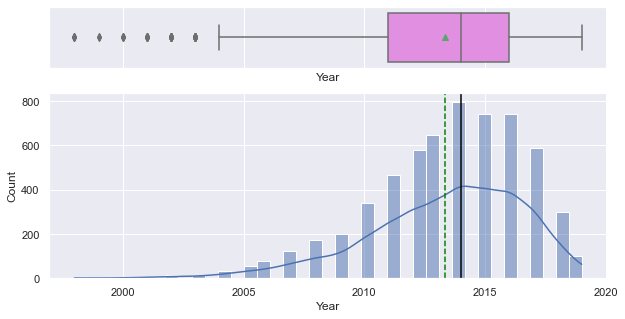

<IPython.core.display.Javascript object>

In [47]:
five_number_summary(df2, "Year")
hist_box(df2, "Year")

- Most the Manufacturing year of the car falls between 2011 and 2016
- Data has left skewedness, which may require Log Transformation....

     "The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality. "

`Analyzinig Numeric Columns: Kilometers_Driven / The total kilometers (a unit used to measure length or distance) driven in the car by the previous owner(s)`

25% 34000.0 
Mean-Green 58738.38029573019 
Median-Boxplot 53000.0 
75% 73000.0 
 StandarD 91268.84320624862 



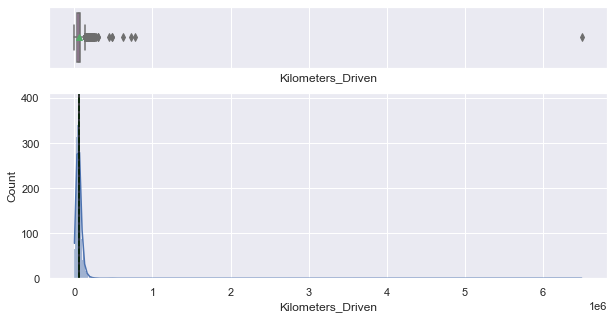

<IPython.core.display.Javascript object>

In [48]:
five_number_summary(df2, "Kilometers_Driven")
hist_box(df2, "Kilometers_Driven")

- There is huge variance in Standard Deviation `91268`
- There're a lot of outliers on the right side
- Pre-Owned vehicles have between 34000 to 75000 KMs on them

`Analyzinig Numeric Columns: Mileage / The standard mileage offered by the car company in kmpl or km/kg`

 
<h5 style="color:Dark">Factors to keep in mind as part of the research</h5>

*************************************************
- According to https://www.iea.org/articles/fuel-economy-in-india  "Anything that is listed as less than 6-litres/100km or more than 16.5km/1-litre is considered to be pretty good. The first (and most common) reference is litres per 100km (litres/100km). This is how many litres of fuel the car needs in order to travel 100km."
- Keeping in mind that diesels can achieve 25-30% better mileage than a gas engine due to the higher efficiency of diesel fuel and it's not uncommon for a diesel-powered car to get 50 mpg or higher.
also, while diesel fuel and diesel vehicles often cost more, diesel vehicles usually hold their resale value better and get better mileage than gas vehicles.
- Keeping in mind that diesels can achieve 25-30% better mileage than a gas engine due to the higher efficiency of diesel fuel and it's not uncommon for a diesel-powered car to get 50 mpg or higher.
also, while diesel fuel and diesel vehicles often cost more, diesel vehicles usually hold their resale value better and get better mileage than gas vehicles.

     Best Fuel-Efficient Passenger Cars
      * Two-Seater: Smart EQ Fortwo (coupe) gets 108 mpg
      * Minicompact: Fiat 500e gets 112 mpg
      * Subcompact: BMW i3 gets 113 mpg
      * Compact: Volkswagen e-Golf gets 119 mpg
      * Mid-Size: Hyundai Ioniq Electric gets 136 mpg
      * Large: Tesla Model S Long Range gets 111 mpg
      * Small Station Wagon: Chevrolet Bolt EV gets 119 mpg


25% 15.17 
Mean-Green 18.134960943992024 
Median-Boxplot 18.15 
75% 21.1 
 StandarD 4.581527636373601 



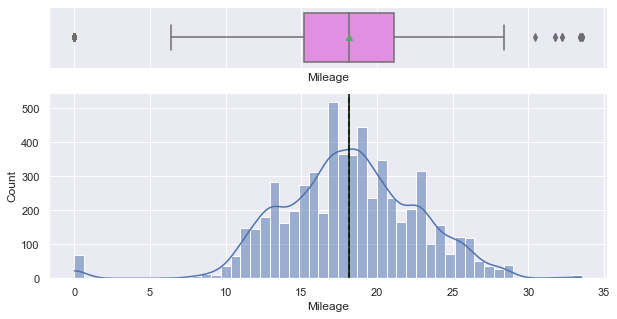

<IPython.core.display.Javascript object>

In [49]:
five_number_summary(df2, "Mileage")
hist_box(df2, "Mileage")

- Given that "16.5 Kilometers per liter = 16.5 x 2.352146 = 38.81 Miles per gallon."  is considered to be pretty good, and in our data we can see that average offered kmpl is at 18.13
- The range of kmpl offered is between 15.17-21.1
- There are outliers in both tail ends, which is making the normal distribution bit imperfect 

`Analyzinig Numeric Columns: Engine / The displacement volume of the engine in CC` 

Cubic Centimeter

- Engine size is the volume of fuel and air that can be pushed through a car's cylinders and is measured in cubic centimetres (cc)
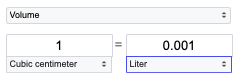





25% 1198.0 
Mean-Green 1621.276449941501 
Median-Boxplot 1493.0 
75% 1969.0 
 StandarD 599.553864926071 



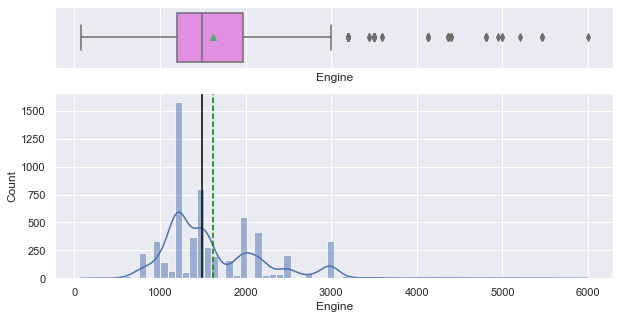

<IPython.core.display.Javascript object>

In [50]:
five_number_summary(df2, "Engine")
hist_box(df2, "Engine")

- There're few outliers in the Engine Data, as data is skewed right 
- Standard deviation is also high
-  Engine Sizes varies between 1198 and 1969 with High Standard Deviation 
- Given, The fact that the lower the cc of the car, the better the mileage obtained, cars with up to 1000 cc give the best mileage. In our case 25% of the Cars are below 1198 CC.


`Analyzinig Numeric Columns: Power`

This column was converted to numerical by removing bhp value from it: Brake Horsepower (bhp) is often used as a more realistic measurement of power. 



While hp does not take into account frictional losses in power from an engine, brake horsepower does — meaning hp is always higher than bhp. The difference between the two is small on a 1:1 basis. 1hp is the equivalent to just under 0.99bhp, though scaled up you'll notice differences

The average for crossovers is 200 hp, midsize autos put out 170 hp, while small SUVs are generally capable of 240 hp

25% 78.0 
Mean-Green 113.25304969366915 
Median-Boxplot 98.6 
75% 138.03 
 StandarD 53.23101941349469 



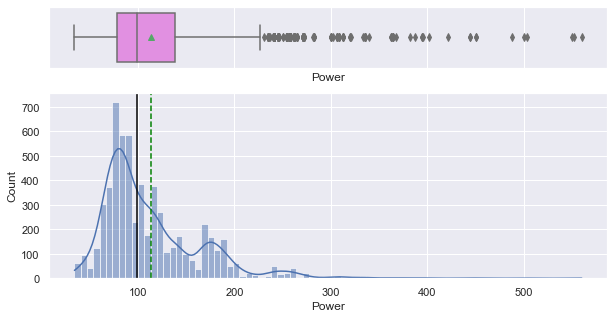

<IPython.core.display.Javascript object>

In [51]:
five_number_summary(df2, "Power")
hist_box(df2, "Power")

- Given that 250 horsepower in a very small car or about 400 horsepower in an exceptionally large vehicle, 75% of our Power data falls below 138bhp indicating that most of our vehicles are small/sedan type cars
- Given that that an average horse power today is between 180-200 hp, and luxury car's hp starts at 250 on average, from the mean-bhp is at 112bhp in our data most of the vehicles shiuld be light vehicles and non luxury vehicles.  
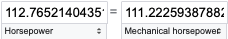

`Analyzinig Numeric Columns: Seats / The number of seats in the car`

25% 5.0 
Mean-Green 5.278735151413753 
Median-Boxplot 5.0 
75% 5.0 
 StandarD 0.8060121419094122 



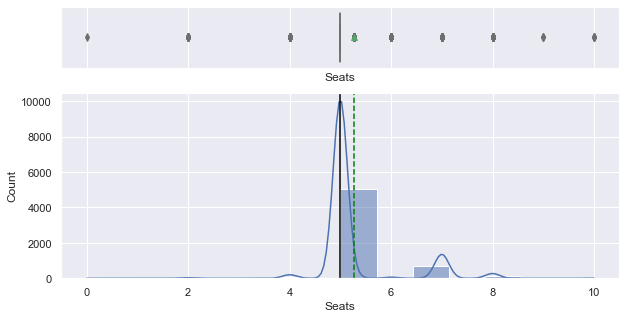

<IPython.core.display.Javascript object>

In [52]:
five_number_summary(df2, "Seats")
hist_box(df2, "Seats")

- Average seating count for our vehicles is at 5, which is expected and proves that most of the vehicles in our data set are light vehicles (.i.e. Sedans)
- There are some outliers mostly in the right side and data is skewed right as well. 
- We can also see that there're very few vehicles that are not 5 seated, as proven by Mean of 5.27

`Analyzinig Numeric Columns: New_Price/The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)`

25% 7.88 
Mean-Green 21.499854627014454 
Median-Boxplot 11.3 
75% 21.77 
 StandarD 24.332922480840452 



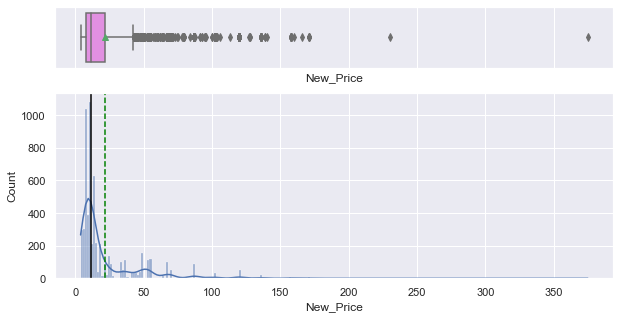

<IPython.core.display.Javascript object>

In [53]:
five_number_summary(df2, "New_Price")
hist_box(df2, "New_Price")

- Price various between almost 8K and 22K with high Standar deviation 
- 75% of the vehicles are under 22K
- There're a lots of outliers on the right side and data is right skewed

`Analyzinig Numeric Columns: Price/The price of the used car in INR Lakhs`

25% 3.5 
Mean-Green 9.47946835022429 
Median-Boxplot 5.64 
75% 9.95 
 StandarD 11.1879171124555 



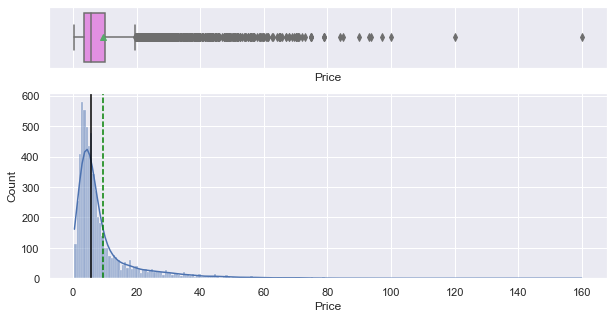

<IPython.core.display.Javascript object>

In [54]:
five_number_summary(df2, "Price")
hist_box(df2, "Price")

- 75% percent of the Used Cars at least 11K cheaper than New Vehicle in New_Price Column
- Median price is at 7k which is just a little under the price tag of less than 25% of the vehicles are found in New_Price Column
- There're alot of Outliers and data is Skewed to the right

`Analyzinig Numeric Columns: Name/The price of the used car in INR Lakhs`

**Grouping Name columns in below categories since we get an error when plotting**

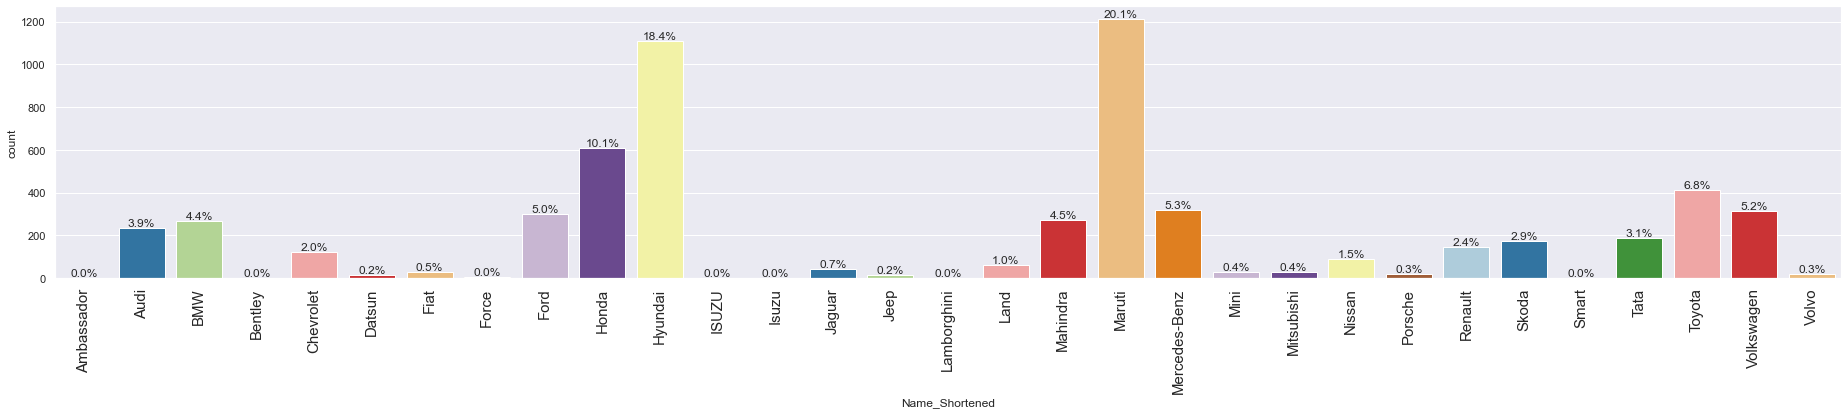

<IPython.core.display.Javascript object>

In [55]:
labeled_barplot(df2, "Name_Shortened", perc=True)

- Maruti, Hyundai followed by Honda are the leading car brands
- As below stats shows around 49% of shares in Indian car market are held by below brands
     * Maruti           19.91 %
     * Hyundai          18.48 %
     * Honda            10.24 %


`Analyzinig Numeric Columns: Location/Location in which the car is being sold or is available for purchase (cities)`

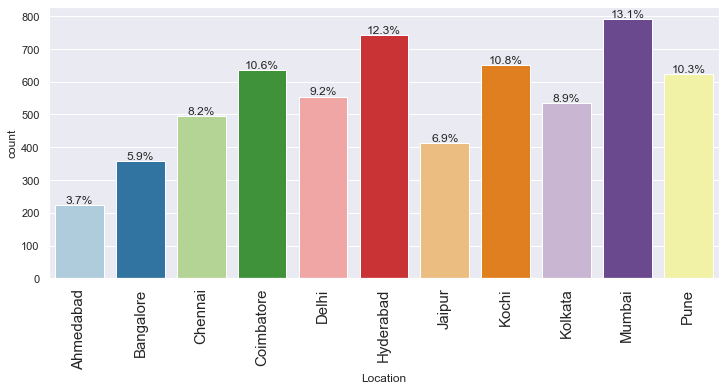

<IPython.core.display.Javascript object>

In [56]:
labeled_barplot(df2, "Location", perc=True)

- Most cars are being sold in Mumbai, Hyderabad followed by Pune and Coimbatore

`Analyzinig Numeric Columns: Fuel_Type/The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)`

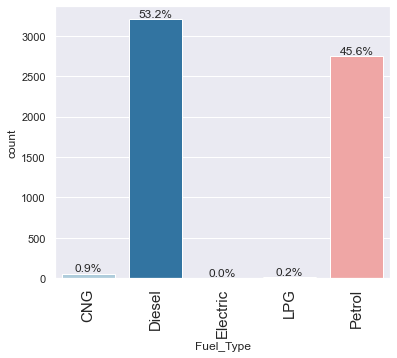

<IPython.core.display.Javascript object>

In [57]:
labeled_barplot(df2, "Fuel_Type", perc=True)

- Diesel and Petrol fueled vehicles are more common in Indian market than others
- Diesel Vehicles holds more than half of the market share at 53%

`Analyzinig Numeric Columns: Transmission/The type of transmission used by the car (Automatic/Manual)`

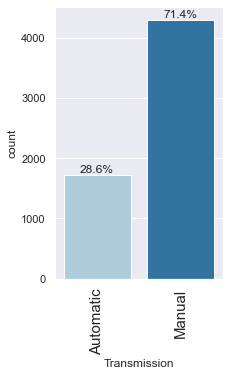

<IPython.core.display.Javascript object>

In [58]:
labeled_barplot(df2, "Transmission", perc=True)

- Manual Transmission type of cars are preffered over Automatic at 71%, this could be due to better mileage on Manual than Automatic

`Analyzinig Numeric Columns: Owner_Type/Type of ownership`

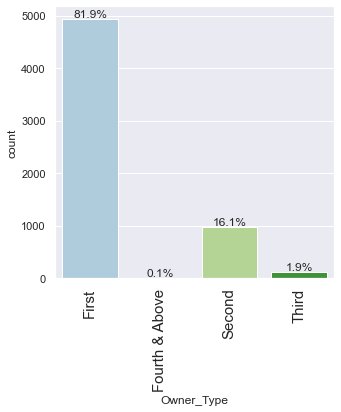

<IPython.core.display.Javascript object>

In [59]:
labeled_barplot(df2, "Owner_Type", perc=True)

- Large majority of the vehicles are first hand at 82%

<h3 style="color:Brown">Bivariate Analysis</h3>

**Checking Correlation in our Data Set**

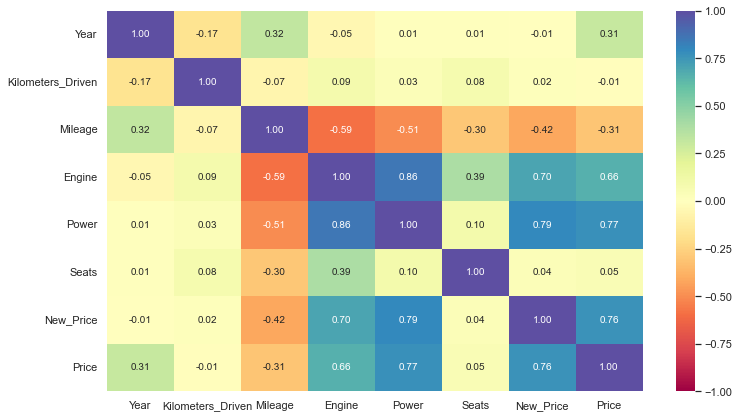

<IPython.core.display.Javascript object>

In [60]:
plt.figure(figsize=(12, 7))
sns.heatmap(df2.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- `Engine` & `Power` - Highly correlated 
- `Power` & `Engine` - Highly correlated 
- `New_Price` & `Power` - Highly correlated 
- `New_Price` & `Engine` - Highly correlated 

Since our objective is simply to predict and not infer, we won't drop the highly correlated independent columns

### `Location` vs `Price`

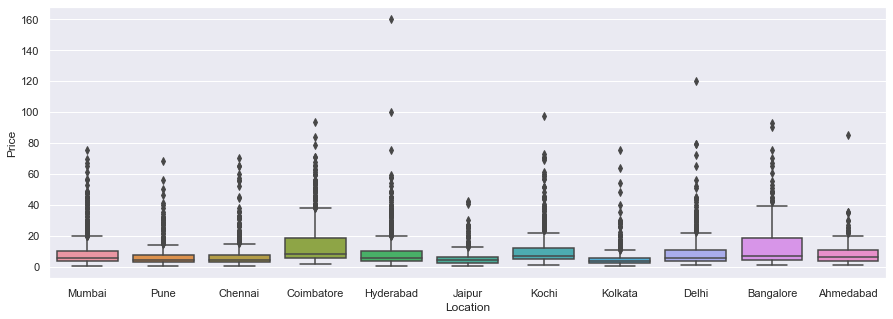

<IPython.core.display.Javascript object>

In [61]:
plt.figure(figsize=(15, 5))
sns.boxplot(x="Location", y="Price", data=df2)
plt.show()

- Less than 75% of vehicles sold in `Coimbatore & Bangalore` are max $20K

- `Coimbatore, Hyderabad, Kochi, Delhi,Bangalore & Ahmedabad` have Prices over $80K

### `Name_Shortened` vs `Price`

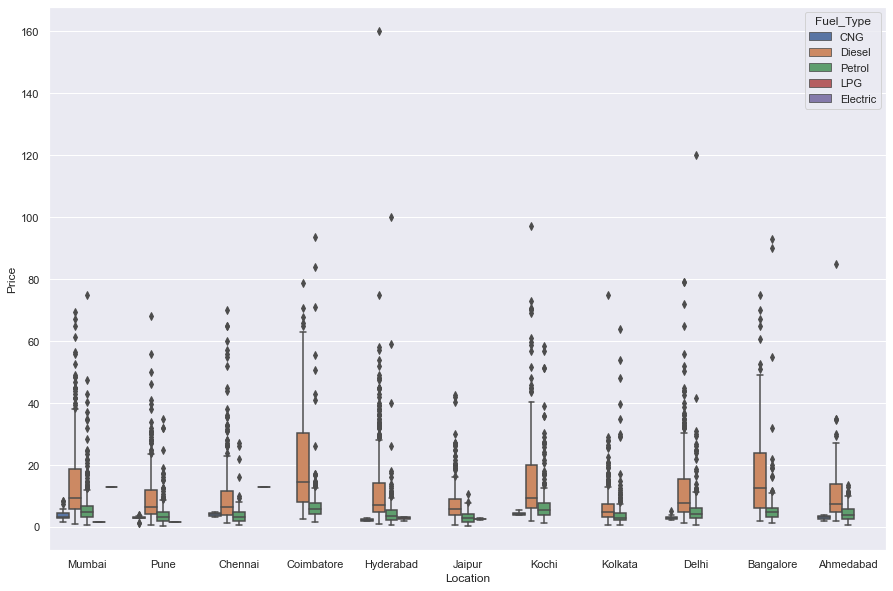

<IPython.core.display.Javascript object>

In [62]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="Location", y="Price", hue="Fuel_Type", data=df2)
plt.show()

- Vehicles with Fuel_Type Diesel are the top sellers
- Coimbatore has the highest number of Diesel Fuled vehicles sold with Median price over $15K


### `Year&Price` vs `Location`

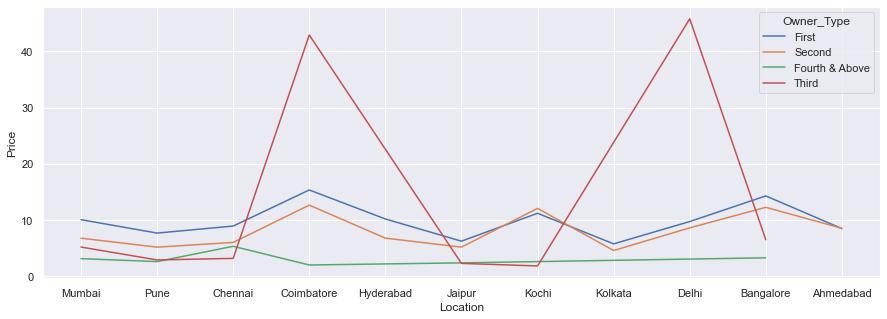

<IPython.core.display.Javascript object>

In [63]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df2, x="Location", y="Price", hue="Owner_Type", ci=None)
plt.show()

- Third hand vehicles are in high demand in Chnnai, Coimbatorem Hyderabad as well as in Kolkata, Delhi and Bangalore

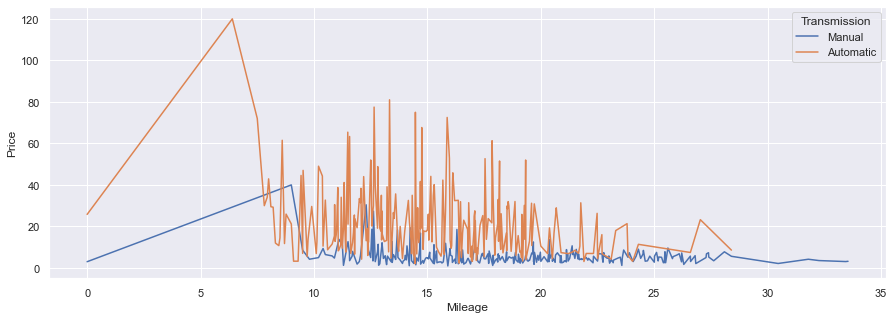

<IPython.core.display.Javascript object>

In [64]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df2, x="Mileage", y="Price", hue="Transmission", ci=None)
plt.show()

- Automatic Transmission with offered kpml of around 6.5 are around $120k

- Manual Transmission with offered kpml of around 9.5 are around $40k - this could be Diesel

- Manual Transmission starting with offered kpml of around 10 and above are under $20

- Automatic Transmission starting with offered kpml of around 9 and above are under $80

- Automatic Transmission vehicles are more expensive than Manual in the long run

<h5 style="background-color:#E3E4FA">Question #0: What does First Hand Vehicles, vehicles with Diesel Fuel_Type and Manual Tranimission have in common Price Wise? </h5>

<h5 style="background-color:#E3E4FA">Question #1:How does the Kilometers_driven affect price and Mileage</h5>

<h5 style="background-color:#E3E4FA">Question #2:What is the key differences in Mileage and Price between Diesel and Petrol fuelds cars?</h5>

<h5 style="background-color:#E3E4FA">Question #3:Given, the fact that the lower the cc of the car,the better the mileage obtained,cars with up to 1000 cc give the best mileage, what is the most expensive vehicle per mileage and CC</h5>

<h5 style="background-color:#E3E4FA">Question #4:How does the price changes per Engines Size, Power and Mileage</h5>

<h5 style="background-color:#E3E4FA">Question #5: What is the price of vehciles as per Seating provided?</h5>

<h5 style="background-color:#E3E4FA">Question #6: In Which city does NewCars(New_Price) sells the most and old cars (Price) sells the most?</h5>

<h5 style="background-color:#E3E4FA">Question #7: Which car model is selling the most in which Location and what is the price?</h5>

<h5 style="background-color:#E3E4FA">Question #8: Which Fuel_Type is preferred the most and its affect on price on that?</h5>

<h5 style="background-color:#E3E4FA">Question #9: What is the Mileage ration per Transmission and affect on price on that?</h5>

<h5 style="background-color:#E3E4FA">Question #10: What is the Price trend on each car branch and how its affected by car brands?</h5>

### <a id='link1'>Summary of EDA</a>

# **Variable Transformations**

#### Checking the numeric columns for skewness

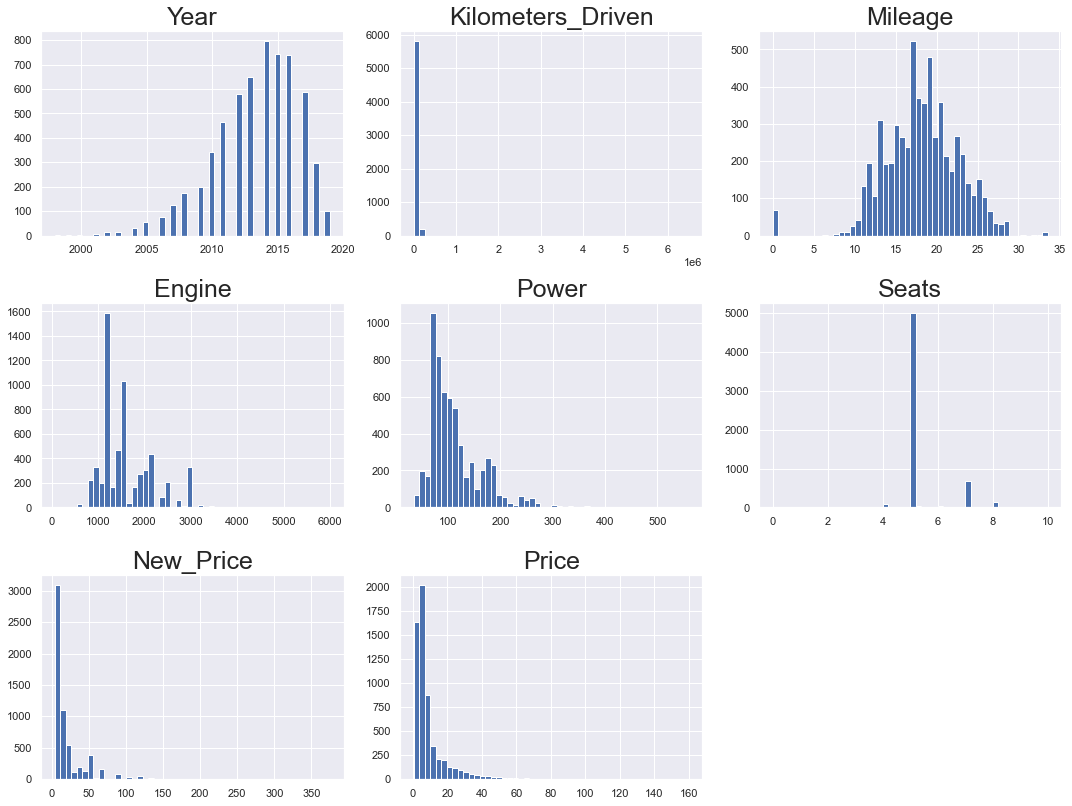

<IPython.core.display.Javascript object>

In [157]:
# creating a list of numerical columns
dist_cols = [item for item in df2.select_dtypes(include=np.number)]

# let's plot a histogram of all non-tag columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df2[dist_cols[i]], bins=50)
    # sns.histplot(data=df2, x=dist_cols[i], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

- As seen above all columns are skewed
- Log Transformation will be applied to all columns except `Price & Seats`
- Seats column can be dropped as it will not be skewed and negativly affect out model

**Making the third copy of the Data Set before Log Transoformation**

In [158]:
df3 = df2.copy()
# removing Seats columns
dist_cols.remove("Seats")
dist_cols.remove("Price")
dist_cols.remove("Name")
dist_cols.remove("Name_Shortened")

ValueError: list.remove(x): x not in list

<IPython.core.display.Javascript object>

In [159]:
# using log transforms on some columns

for col in dist_cols:
    df3[col + "_log"] = np.log(df3[col] + 1)

# dropping the original columns
df3.drop(dist_cols, axis=1, inplace=True)
df3.head()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Seats,Price,Name_Shortened,Year_log,Kilometers_Driven_log,Mileage_log,Engine_log,Power_log,New_Price_log
0,Maruti Wagon R LXI CNG,Mumbai,CNG,Manual,First,5.0,1.75,Maruti,7.606387,11.184435,3.317816,6.906755,4.080246,1.873339
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First,5.0,12.50,Hyundai,7.608871,10.621352,3.028683,7.367077,4.845761,2.836737
2,Honda Jazz V,Chennai,Petrol,Manual,First,5.0,4.50,Honda,7.606885,10.736418,2.954910,7.090077,4.496471,2.262804
3,Maruti Ertiga VDI,Chennai,Diesel,Manual,First,7.0,6.00,Maruti,7.607381,11.373675,3.080533,7.130099,4.497139,2.507157
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second,5.0,17.74,Audi,7.607878,10.613271,2.785011,7.585281,4.954418,3.991573


<IPython.core.display.Javascript object>

**Checking for skewness after applying the log transformation**

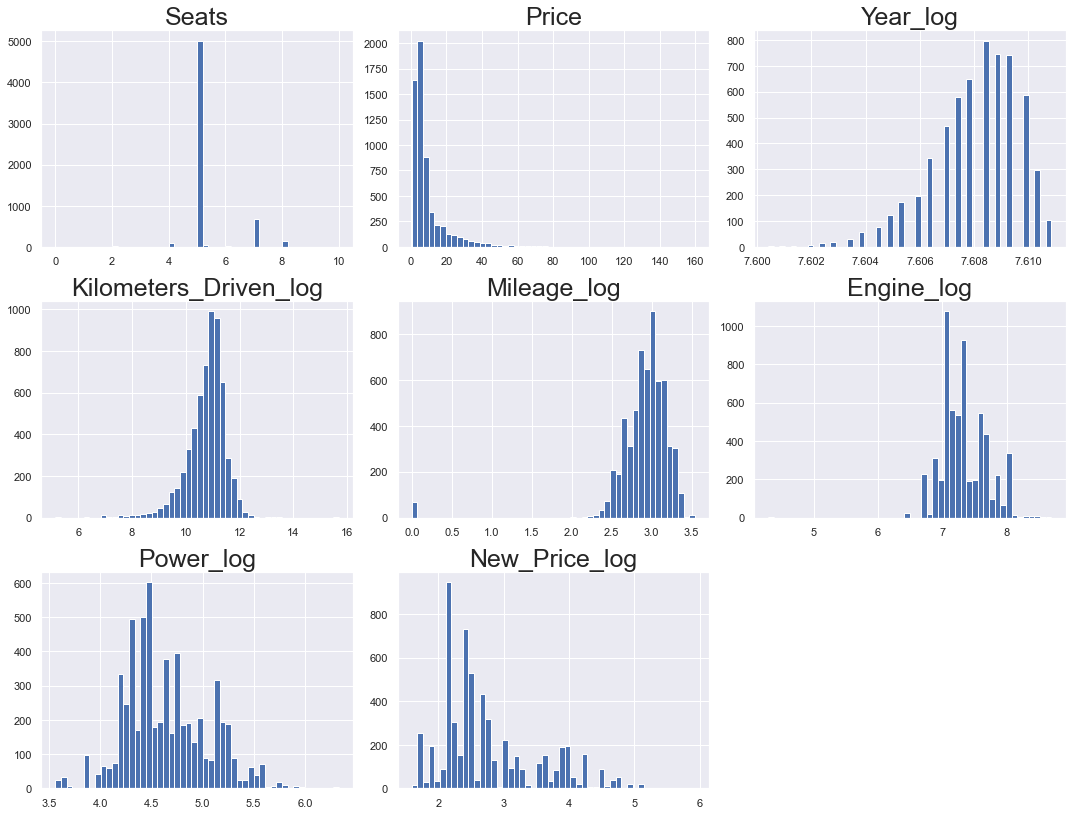

<IPython.core.display.Javascript object>

In [160]:
# creating a list of non-tag columns
dist_cols = [item for item in df3.select_dtypes(include=np.number)]

# let's plot histogram of all non-tag columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(df3[dist_cols[i]], bins=50)
    # sns.histplot(data=df3, x=dist_cols[i], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

- The Columns are still skewed but not as bad as before 

**Checking the correlation again after Log transormation**

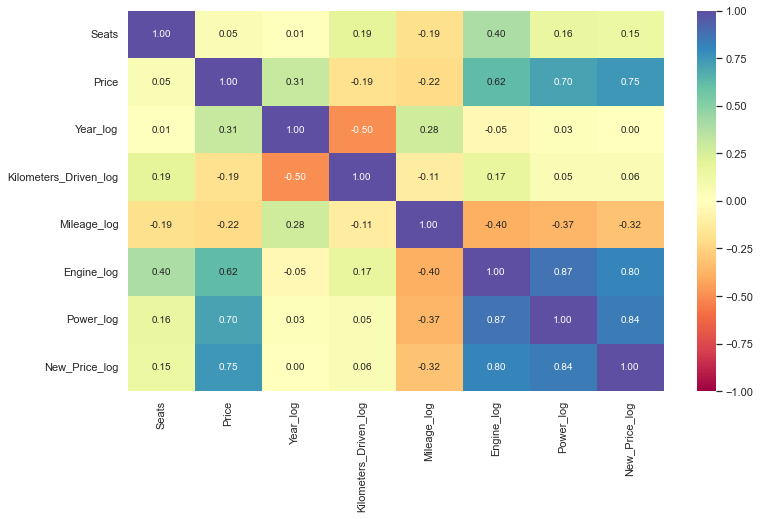

<IPython.core.display.Javascript object>

In [161]:
plt.figure(figsize=(12, 7))
sns.heatmap(df3.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- There're still few highly correlated columns

# **Model Building**
_______________________________________________________

<h3 style="color:Brown">Define Dependent Variable</h3>

In [162]:
X = df3.drop(["Price"], axis=1)
y = df3["Price"]

<IPython.core.display.Javascript object>

<h3 style="color:Brown">One-Hot Encoding categorical columns before Building ML Models</h3>

In [163]:
# See how many objects and categories we have in our third copy of Data Set
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   6019 non-null   object 
 1   Location               6019 non-null   object 
 2   Fuel_Type              6019 non-null   object 
 3   Transmission           6019 non-null   object 
 4   Owner_Type             6019 non-null   object 
 5   Seats                  6019 non-null   float64
 6   Name_Shortened         6019 non-null   object 
 7   Year_log               6019 non-null   float64
 8   Kilometers_Driven_log  6019 non-null   float64
 9   Mileage_log            6019 non-null   float64
 10  Engine_log             6019 non-null   float64
 11  Power_log              6019 non-null   float64
 12  New_Price_log          6019 non-null   float64
dtypes: float64(7), object(6)
memory usage: 611.4+ KB


<IPython.core.display.Javascript object>

In [164]:
# Converting Objects and Categories into 0's and 1's
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

Seats  Year_log  Kilometers_Driven_log  Mileage_log  Engine_log  Power_log  \
0    5.0  7.606387              11.184435     3.317816    6.906755   4.080246   
1    5.0  7.608871              10.621352     3.028683    7.367077   4.845761   
2    5.0  7.606885              10.736418     2.954910    7.090077   4.496471   
3    7.0  7.607381              11.373675     3.080533    7.130099   4.497139   
4    5.0  7.607878              10.613271     2.785011    7.585281   4.954418   

   New_Price_log  Name_Audi A3 35 TDI Attraction  Name_Audi A3 35 TDI Premium  \
0       1.873339                               0                            0   
1       2.836737                               0                            0   
2       2.262804                               0                            0   
3       2.507157                               0                            0   
4       3.991573                               0                            0   

   Name_Audi A3 35 TDI Premium Plus  Name_Audi A3 35 TDI Technology  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               0   
3                                 0                               0   
4                                 0                               0   

   Name_Audi A4 1.8 TFSI  Name_Audi A4 1.8 TFSI Technology Edition  \
0                      0                                         0   
1                      0                                         0   
2                      0                                         0   
3                      0                                         0   
4                      0                                         0   

   Name_Audi A4 2.0 TDI  Name_Audi A4 2.0 TDI 177 Bhp Premium Plus  \
0                     0                                          0   
1                     0                                          0   
2                     0                                          0   
3                     0                                          0   
4                     0                                          0   

   Name_Audi A4 2.0 TDI 177 Bhp Technology Edition  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Name_Audi A4 2.0 TDI Celebration Edition  Name_Audi A4 2.0 TDI Multitronic  \
0                                         0                                 0   
1                                         0                                 0   
2                                         0                                 0   
3                                         0                                 0   
4                                         0                                 0   

   Name_Audi A4 2.0 TDI Premium Sport Limited Edition  Name_Audi A4 2.0 TFSI  \
0                                                  0                       0   
1                                                  0                       0   
2                                                  0                       0   
3                                                  0                       0   
4                                                  0                       0   

   Name_Audi A4 3.0 TDI Quattro  Name_Audi A4 3.0 TDI Quattro Premium  \
0                             0                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             0                                     0   

   Name_Audi A4 3.2 FSI Tipt

<IPython.core.display.Javascript object>

<h3 style="color:Brown">Split the data into train and test</h3>

In [165]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [166]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4213
Number of rows in test data = 1806


<IPython.core.display.Javascript object>

<h3 style="color:Brown">Fitting a linear model</h3>

In [167]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

<h3 style="color:Brown">Model performance check</h3>

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.

* We will define functions to calculate adjusted $R^2$ and MAPE.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.

* We will create a function that will print out all the above metrics in one go.

In [168]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [169]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.978547,0.980006,0.969385,0.943492,17.072434


<IPython.core.display.Javascript object>

In [170]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.511339e+11,6.097828e+10,-5.310819e+20,7.668822e+21,1.512303e+12


<IPython.core.display.Javascript object>

### <a id='link1'>Conclusions</a>

# **Insights and Recommendations that will help the business**
_______________________________________________________

`@author mirali - Created on Friday Feb 3 - Start your work from the next line`